# Exploratory Data Analysis

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
# import matplotlib.pylib as plt
import matplotlib.pyplot as plt
import sqlite3
plt.style.use('ggplot')

## Load Data

In [440]:
cnx = sqlite3.connect('data/agri.db') # Establish connection to SQLite database file agri.db

df = pd.read_sql_query("SELECT * FROM farm_data", cnx) # Retrieve all rows and columns from farm_data table in the database and load result into Pandas dataframe df
df # Dataframe

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53 ppm,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,VINE CROPS,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,VINE CROPS,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


## Data Understanding

In [441]:
df.shape # Understand size of dataset

(57489, 15)

We see that the dataframe has 57489 rows and 15 columns.

In [442]:
df.columns # List out columns for easy reference

Index(['System Location Code', 'Previous Cycle Plant Type', 'Plant Type',
       'Plant Stage', 'Temperature Sensor (°C)', 'Humidity Sensor (%)',
       'Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'EC Sensor (dS/m)',
       'O2 Sensor (ppm)', 'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
       'Nutrient K Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)'],
      dtype='object')

In [443]:
df.info() # List the column names and their respective data types, show if there are Null entries in each column to spot improperly formatted and missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

Only some columns have no Null values (thise with 57489 Non-Null Count). The rest of the columns have multiple Null vaues that we will have to replace during data cleaning.

## Data Cleaning

In [444]:
# Some entries in the Nutrient Sensor columns have "ppm" following the integers - let's strip that
df['Nutrient N Sensor (ppm)'] = df['Nutrient N Sensor (ppm)'].str.rstrip(" ppm")
df['Nutrient P Sensor (ppm)'] = df['Nutrient P Sensor (ppm)'].str.rstrip(" ppm")
df['Nutrient K Sensor (ppm)'] = df['Nutrient K Sensor (ppm)'].str.rstrip(" ppm")
df

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,VINE CROPS,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,herbs,maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,fruiting vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53,289,6.6,NaN
4,Zone_B,Vine Crops,LEAFY GREENS,seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,VINE CROPS,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,VINE CROPS,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


In [445]:
df["System Location Code"].value_counts() # Check unique values to identify any inconsistencies or anomalies in System Location Code - all good here

System Location Code
Zone_B    8296
Zone_G    8287
Zone_E    8272
Zone_C    8268
Zone_F    8156
Zone_A    8148
Zone_D    8062
Name: count, dtype: int64

In [446]:
df["Previous Cycle Plant Type"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Previous Cycle Plant Type - all good here

Previous Cycle Plant Type
Fruiting Vegetables    14481
Leafy Greens           14446
Vine Crops             14305
Herbs                  14257
Name: count, dtype: int64

In [447]:
df["Plant Type"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Plant Type


Plant Type
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: count, dtype: int64

We can see different capitalization styles for similar categories of Plant Type. Let's clean that up and standardize all Plant Types to Title Case.

In [448]:
df["Plant Type"] = df["Plant Type"].map(str.title) # Standardize the Plant Type column by converting each value to title case
df["Plant Type"].value_counts() # Check unique values - all good now

Plant Type
Herbs                  14421
Fruiting Vegetables    14419
Leafy Greens           14392
Vine Crops             14257
Name: count, dtype: int64

In [449]:
df["Plant Stage"].value_counts() # Check unique values to identify any inconsistencies or anomalies in Plant Stage

Plant Stage
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: count, dtype: int64

We can see different capitalization styles for similar categories of Plant Stage. Let's clean that up and standardize all Plant Stages to Title Case.

In [450]:
df["Plant Stage"] = df["Plant Stage"].map(str.title) # Standardize the Plant Stage column by converting each value to title case
df["Plant Stage"].value_counts() # Check unique values - all good now

Plant Stage
Seedling      19425
Vegetative    19062
Maturity      19002
Name: count, dtype: int64

In [451]:
df # Look at data frame after cleaning

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.34,NaN,454.0,937,1.82,4,161,64,201,6.1,28.150346
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.16,63.14,441.0,938,2.13,6,161,53,None,6.5,31.000000
2,Zone_F,Herbs,Herbs,Maturity,23.84,NaN,562.0,1246,1.21,8,228,79,292,6.4,26.000000
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.61,NaN,651.0,1346,1.96,6,None,53,289,6.6,NaN
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.88,NaN,144.0,812,2.76,5,61,19,168,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,NaN,NaN,619.0,1074,1.95,6,150,61,210,6.4,NaN
57486,Zone_E,Herbs,Vine Crops,Seedling,24.85,NaN,203.0,816,0.98,7,121,41,114,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.45,64.89,502.0,911,2.27,5,190,57,196,5.9,35.000000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

Let's convert all numeric data to Numeric type

In [453]:
df['Temperature Sensor (°C)'] = pd.to_numeric(df['Temperature Sensor (°C)'], errors='coerce')
df['Humidity Sensor (%)'] = pd.to_numeric(df['Humidity Sensor (%)'], errors='coerce')
df['Light Intensity Sensor (lux)'] = pd.to_numeric(df['Light Intensity Sensor (lux)'], errors='coerce')
df['Nutrient N Sensor (ppm)'] = pd.to_numeric(df['Nutrient N Sensor (ppm)'], errors='coerce')
df['Nutrient P Sensor (ppm)'] = pd.to_numeric(df['Nutrient P Sensor (ppm)'], errors='coerce')
df['Nutrient K Sensor (ppm)'] = pd.to_numeric(df['Nutrient K Sensor (ppm)'], errors='coerce')
df['Water Level Sensor (mm)'] = pd.to_numeric(df['Water Level Sensor (mm)'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  float64
 11  Nutrient P Sensor (ppm)       51791 non-null  float64
 12  Nutrient K Sensor (ppm)       53788 non-null  float64
 13  p

In [454]:
df.isna().sum() # check for NaN (missing) values

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64

In [455]:
df.describe() # Generate summary statistics for numerical columns in the datafame

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
count,48800.000000,18622.000000,53211.000000,57489.000000,57489.000000,57489.000000,47515.000000,51791.000000,53788.000000,57489.000000,48847.000000
mean,22.138201,69.243535,397.841668,1083.376576,1.624435,6.580842,157.684205,49.858431,217.990277,6.021446,25.716878
std,7.556981,5.725973,222.923860,172.570351,0.415535,1.145534,45.700829,15.414867,60.697365,0.400251,5.815294
min,-28.570000,59.220000,-799.000000,799.000000,-0.250000,3.000000,49.000000,19.000000,99.000000,3.800000,10.001955
25%,22.140000,64.340000,257.000000,950.000000,1.360000,6.000000,124.000000,37.000000,170.000000,5.800000,21.313361
50%,23.210000,68.700000,403.000000,1071.000000,1.650000,7.000000,158.000000,50.000000,215.000000,6.000000,26.000000
75%,24.350000,74.117500,553.000000,1178.000000,1.900000,7.000000,190.000000,62.000000,266.000000,6.300000,30.000000
max,28.750000,81.140000,800.000000,1500.000000,3.440000,11.000000,250.000000,80.000000,350.000000,7.800000,39.998717


Let's substitute the Mean as a reasonable guess for the missing values

In [456]:
from sklearn.impute import SimpleImputer

# Imputing missing values with mean
imputer = SimpleImputer(strategy='mean')
df['Temperature Sensor (°C)'] = imputer.fit_transform(df[['Temperature Sensor (°C)']])
df['Humidity Sensor (%)'] = imputer.fit_transform(df[['Humidity Sensor (%)']])
df['Light Intensity Sensor (lux)'] = imputer.fit_transform(df[['Light Intensity Sensor (lux)']])
df['Nutrient N Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient N Sensor (ppm)']])
df['Nutrient P Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient P Sensor (ppm)']])
df['Nutrient K Sensor (ppm)'] = imputer.fit_transform(df[['Nutrient K Sensor (ppm)']])
df['Water Level Sensor (mm)'] = imputer.fit_transform(df[['Water Level Sensor (mm)']])

In [457]:
df.isna().sum() # check if there are stilo any NaN (missing) values

System Location Code            0
Previous Cycle Plant Type       0
Plant Type                      0
Plant Stage                     0
Temperature Sensor (°C)         0
Humidity Sensor (%)             0
Light Intensity Sensor (lux)    0
CO2 Sensor (ppm)                0
EC Sensor (dS/m)                0
O2 Sensor (ppm)                 0
Nutrient N Sensor (ppm)         0
Nutrient P Sensor (ppm)         0
Nutrient K Sensor (ppm)         0
pH Sensor                       0
Water Level Sensor (mm)         0
dtype: int64

Perfect, we have a filled-in dataframe now!

In [458]:
df

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm)
0,Zone_D,Herbs,Vine Crops,Maturity,23.340000,69.243535,454.0,937,1.82,4,161.000000,64.0,201.000000,6.1,28.150346
1,Zone_G,Herbs,Vine Crops,Vegetative,-24.160000,63.140000,441.0,938,2.13,6,161.000000,53.0,217.990277,6.5,31.000000
2,Zone_F,Herbs,Herbs,Maturity,23.840000,69.243535,562.0,1246,1.21,8,228.000000,79.0,292.000000,6.4,26.000000
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.610000,69.243535,651.0,1346,1.96,6,157.684205,53.0,289.000000,6.6,25.716878
4,Zone_B,Vine Crops,Leafy Greens,Seedling,22.880000,69.243535,144.0,812,2.76,5,61.000000,19.0,168.000000,5.5,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878
57486,Zone_E,Herbs,Vine Crops,Seedling,24.850000,69.243535,203.0,816,0.98,7,121.000000,41.0,114.000000,4.9,21.000000
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.450000,64.890000,502.0,911,2.27,5,190.000000,57.0,196.000000,5.9,35.000000


## Deal With Outliers

Let's create boxplots to identify outliers in the data:

<Axes: >

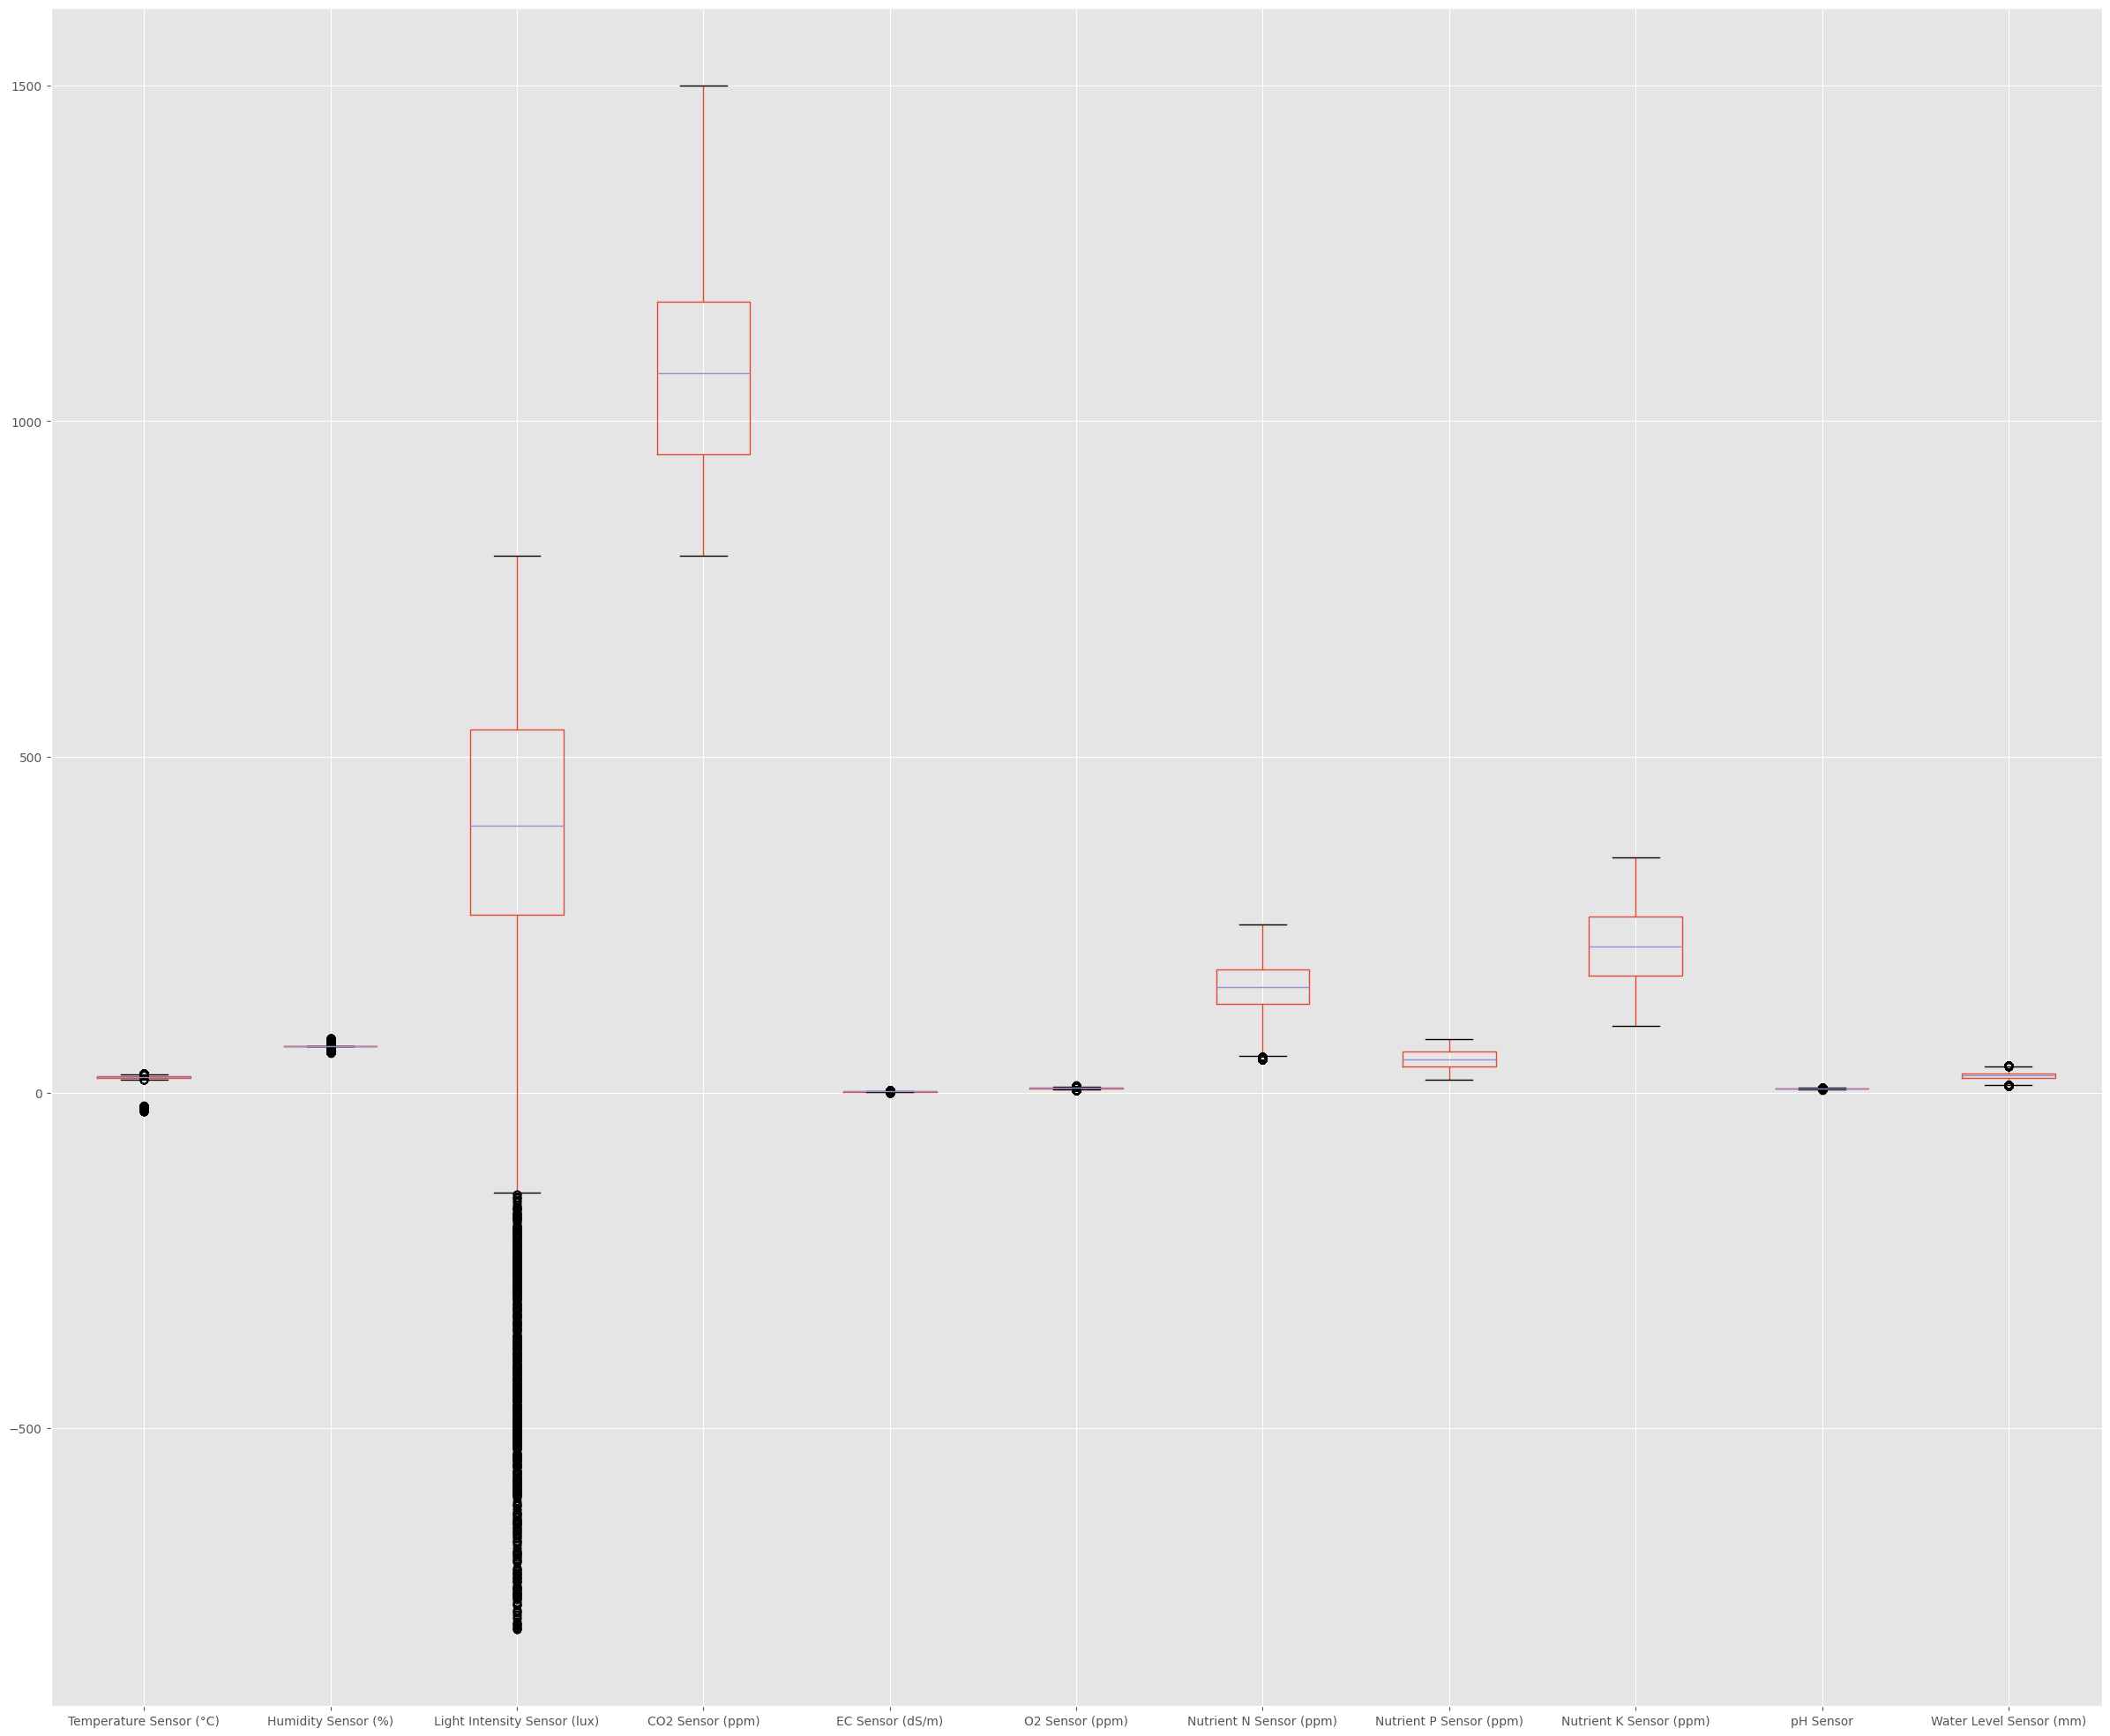

In [459]:
df.boxplot() # Boxplot


All the little circles show outliers in the data.

#### Temperature Sensor (°C) Outliers

Let's do an exploratory scatterplot on the Temperature and Plant Type:

<Axes: xlabel='Plant Type', ylabel='Temperature Sensor (°C)'>

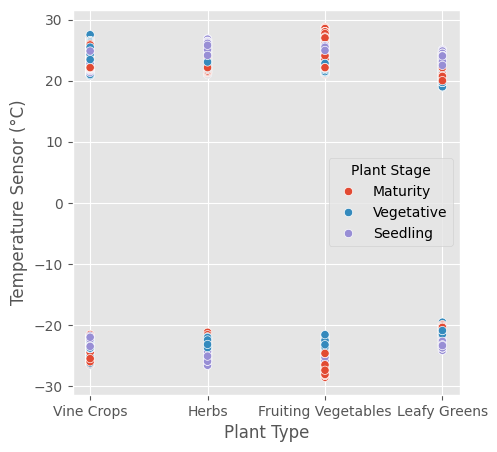

In [460]:
plt.figure(figsize=(5, 5)) 
sns.scatterplot(x='Plant Type',
                y='Temperature Sensor (°C)',
                hue='Plant Stage',
                data=df)

Negative temperatures in the range of -20°C to -30°C for plants are highly unusual, especially in a controlled farm environment where the temperature is typically optimized for plant growth. 
Most plants cannot survive such extreme negative temperatures, let alone thrive. The negative values are likely erroneous.

Let's explore the Temperature data by checking the distribution.
Let's plot the temperature data to identify patterns and anomalies:

Text(0.5, 1.0, 'Histogram of Temperature Sensor (°C)')

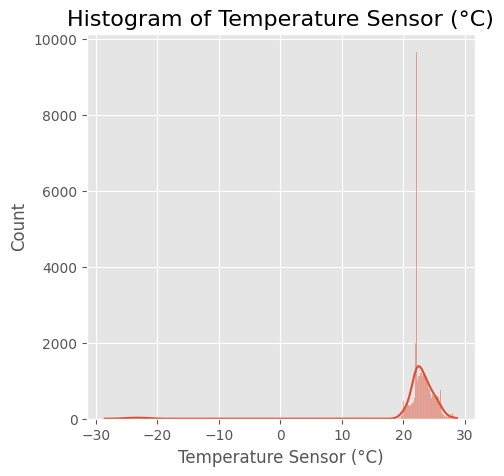

In [461]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Temperature Sensor (°C)'], kde=True)
plt.title('Histogram of Temperature Sensor (°C)', fontsize=16)

It seems like the negative temperatures are anomalies because they consist of only a small percentage of the data.
Since the negative temperature data all falls within the range of -20 to -30 °C, which is exactly opposite of the normal 20 to 30 °C range for plants, we assume that the negative temperature data is due to a sensor or input error and hence will flip the negative values to positive:

In [462]:
df['Temperature Sensor (°C)'] = df['Temperature Sensor (°C)'].abs() # Flip negative Temperature values to positive

#### Humidity Sensor (%) Outliers

The boxplot for the Humidity Sensor (%) looks like it has data tightly clustered around a central value and some outliers. It suggests that there is high variability or a large number of extreme values for Humidity (%). 
Let's understand the distribution of the Humidity Sensor (%) data by plotting a histogram:

Text(0.5, 1.0, 'Humidity Sensor (%)')

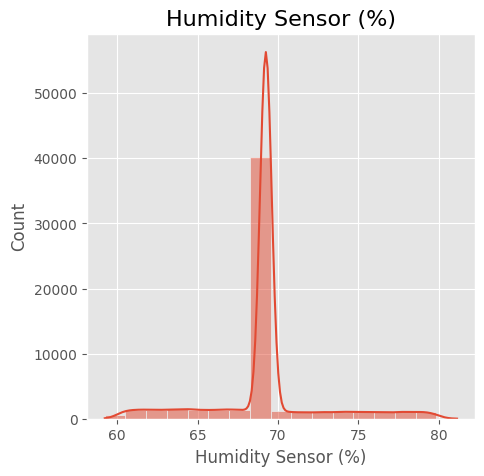

In [463]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Humidity Sensor (%)'], kde=True)
plt.title('Humidity Sensor (%)', fontsize=16)

Let's use summary statistics to identify potential outliers or extreme values:

In [464]:
df['Humidity Sensor (%)'].describe()

count    57489.000000
mean        69.243535
std          3.258834
min         59.220000
25%         69.243535
50%         69.243535
75%         69.243535
max         81.140000
Name: Humidity Sensor (%), dtype: float64

It seems that the outliers do not have values that are too extreme.

Concentration around the mean: The fact that the 25th, 50th, and 75th percentiles all equal the mean (69.24%) suggests that the data is concentrated around this value with little skew or outliers. This could indicate a narrow, consistent range of humidity values for the majority of the data points.

Mild variation: The standard deviation (3.26%) is relatively small, implying that most of the data points are not far from the mean. This suggests that the system is relatively stable, with the humidity levels typically fluctuating only by a small amount around the mean.

Possible outliers: Given that the minimum value is 59.22% and the maximum value is 81.14%, there could be some outliers or less frequent extreme readings in the dataset, but the interquartile range (25%–75%) is tightly clustered around the mean, suggesting that most of the data is consistent.

Overall, the data appears to be stable and tightly clustered around a central value of 69.24%, with only a small variation in the humidity readings.

**Given the relatively small standard deviation (3.26%) and tight concentration of most data points around the mean (with quartiles close to 69.24%), we can leave the data as is and not make any changes.**

#### Light Intensity Sensor (lux) Outliers

The boxplot for the Light Intensity Sensor (lux) looks like it has many outliers (due to the number or circles outside the lower tail of the boxplot). It suggests that there is a large number of extreme low values for Light Intensity. 
Let's understand the distribution of the Light Intensity Sensor (lux) data by plotting a histogram:

Text(0.5, 1.0, 'Light Intensity (lux)')

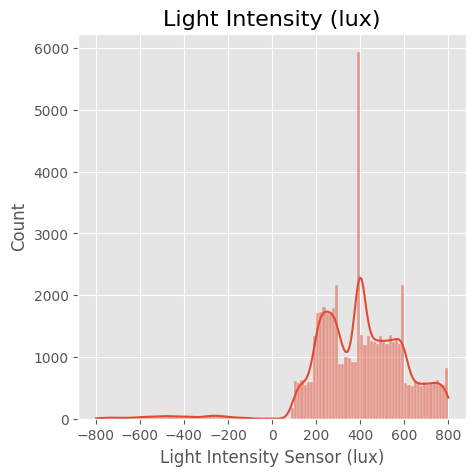

In [465]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Light Intensity Sensor (lux)'], kde=True)
plt.title('Light Intensity (lux)', fontsize=16)

In [466]:
num_outliers = df[df['Light Intensity Sensor (lux)'] < 0].shape[0]
num_outliers

1385

We have 1,385 rows with sub-zero "Light Intensity" values, indicating that there are data issues, as light intensity should logically be non-negative.
Since the negative values are errors, the most straightforward approach would be to remove those rows.

In [467]:
df = df[df['Light Intensity Sensor (lux)'] >= 0] # Remove rows where Light Intensity is less than 0

df.shape # Check if rows have been removed

(56104, 15)

#### CO2 Sensor (ppm) Outliers

Text(0.5, 1.0, 'CO2 Levels (ppm)')

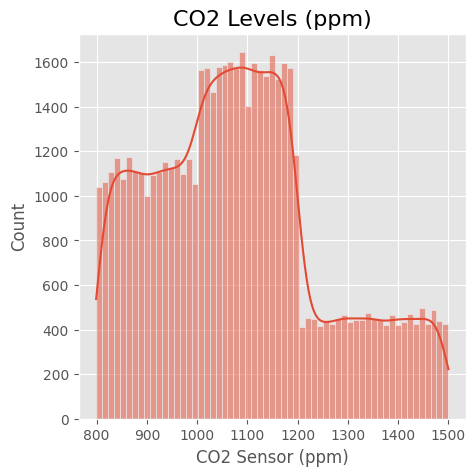

In [468]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['CO2 Sensor (ppm)'], kde=True)
plt.title('CO2 Levels (ppm)', fontsize=16)

CO2 Sensor (ppm) data looks good. Nothing to clean here.

#### EC Sensor (dS/m) Outliers

Text(0.5, 1.0, 'EC Conductivity (dS/m)')

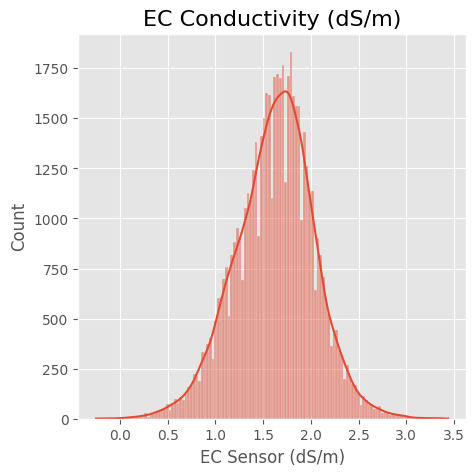

In [469]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['EC Sensor (dS/m)'], kde=True)
plt.title('EC Conductivity (dS/m)', fontsize=16)

EC Sensor (dS/m) data looks like a normal distribution.

Text(0.5, 1.0, 'Electrical Conductivity (dS/m)')

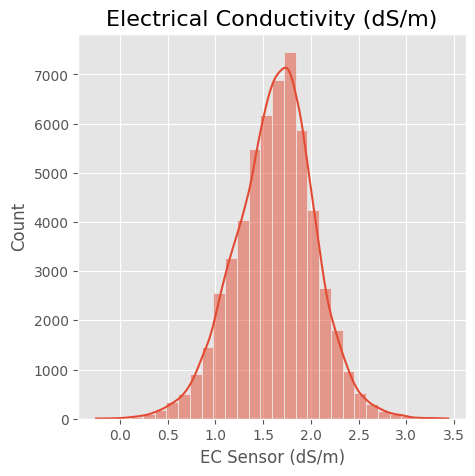

In [470]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['EC Sensor (dS/m)'], bins=30, kde=True)
plt.title('Electrical Conductivity (dS/m)', fontsize=16)

Text(0.5, 1.0, 'Electrical Conductivity (dS/m)')

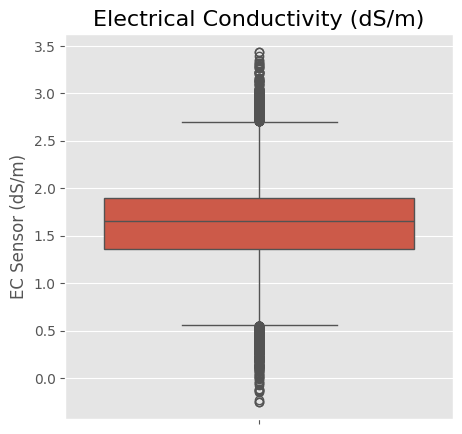

In [471]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['EC Sensor (dS/m)'])
plt.title('Electrical Conductivity (dS/m)', fontsize=16)

In [472]:
df['EC Sensor (dS/m)'].describe()

count    56104.000000
mean         1.624758
std          0.415115
min         -0.250000
25%          1.360000
50%          1.650000
75%          1.900000
max          3.440000
Name: EC Sensor (dS/m), dtype: float64

Electrical Conductivity for plants typically cannot be negative. This suggests measurement errors, sensor malfunctions, or data entry issues.
Negative EC values (-0.25) are likely invalid. We will remove rows with negative EC values to ensure data integrity:

In [473]:
df = df[df['EC Sensor (dS/m)'] >= 0] # Filter out rows where EC value is negative

We will use the Interquartile Range (IQR) method to identify and remove extreme outliers:

In [474]:
Q1 = df['EC Sensor (dS/m)'].quantile(0.25)
Q3 = df['EC Sensor (dS/m)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df = df[(df['EC Sensor (dS/m)'] >= lower_bound) & (df['EC Sensor (dS/m)'] <= upper_bound)]


#### O2 Sensor (ppm) Outliers

Text(0.5, 1.0, 'O2 Level (ppm)')

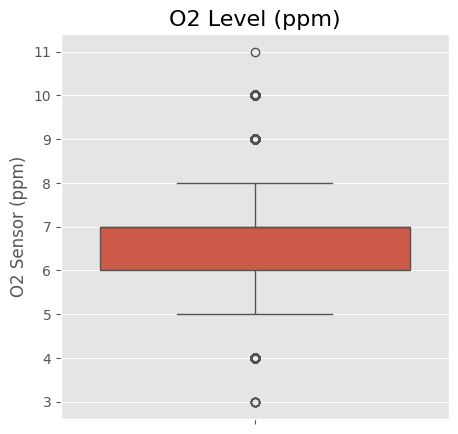

In [475]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['O2 Sensor (ppm)'])
plt.title('O2 Level (ppm)', fontsize=16)

In [476]:
df['O2 Sensor (ppm)'].describe()

count    55262.000000
mean         6.581738
std          1.145693
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         11.000000
Name: O2 Sensor (ppm), dtype: float64

O2 Sensor data looks alright, so we will not be cleaning it.

#### Nutrient N Sensor (ppm) Outliers

Text(0.5, 1.0, 'Nutrient N Level (ppm)')

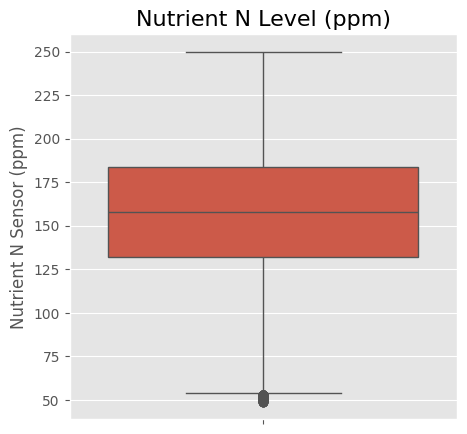

In [477]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['Nutrient N Sensor (ppm)'])
plt.title('Nutrient N Level (ppm)', fontsize=16)

Text(0.5, 1.0, 'Nutrient N Level (ppm)')

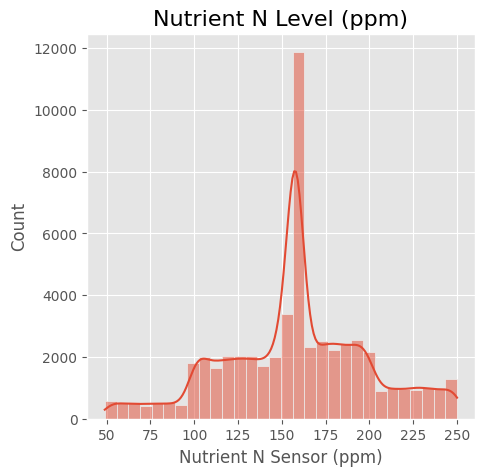

In [478]:
plt.figure(figsize=(5,5)) 
sns.histplot(df['Nutrient N Sensor (ppm)'], bins=30, kde=True)
plt.title('Nutrient N Level (ppm)', fontsize=16)

In [479]:
df['Nutrient N Sensor (ppm)'].describe()

count    55262.000000
mean       157.866946
std         41.552461
min         49.000000
25%        132.000000
50%        157.684205
75%        184.000000
max        250.000000
Name: Nutrient N Sensor (ppm), dtype: float64

Nutrient N Sensor data looks alright, no need to clean.

#### Nutrient P Sensor (ppm) Outliers

Text(0.5, 1.0, 'Nutrient P Level (ppm)')

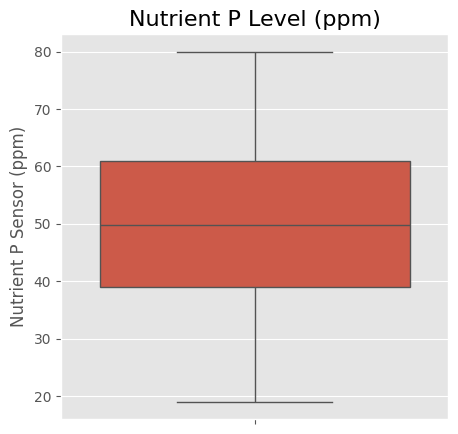

In [480]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['Nutrient P Sensor (ppm)'])
plt.title('Nutrient P Level (ppm)', fontsize=16)

Text(0.5, 1.0, 'Nutrient P Level (ppm)')

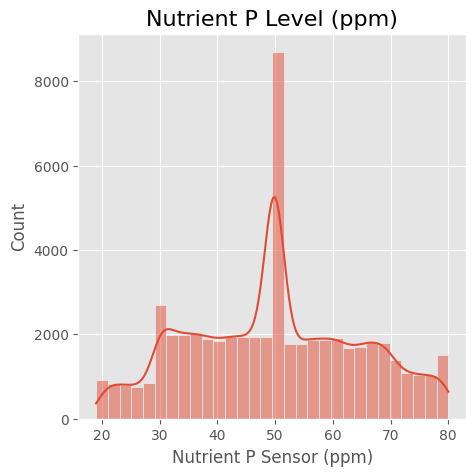

In [481]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Nutrient P Sensor (ppm)'], bins=30, kde=True)
plt.title('Nutrient P Level (ppm)', fontsize=16)

In [482]:
df['Nutrient P Sensor (ppm)'].describe()

count    55262.000000
mean        49.883427
std         14.628136
min         19.000000
25%         39.000000
50%         49.858431
75%         61.000000
max         80.000000
Name: Nutrient P Sensor (ppm), dtype: float64

Nutrient P Sensor data looks alright, no need to clean.

#### Nutrient K Sensor (ppm) Outliers

Text(0.5, 1.0, 'Nutrient K Level (ppm)')

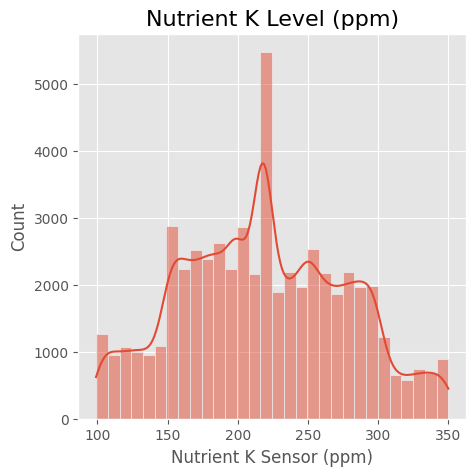

In [483]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Nutrient K Sensor (ppm)'], bins=30, kde=True)
plt.title('Nutrient K Level (ppm)', fontsize=16)

In [484]:
df['Nutrient K Sensor (ppm)'].describe()

count    55262.000000
mean       218.195455
std         58.729344
min         99.000000
25%        174.000000
50%        217.990277
75%        262.000000
max        350.000000
Name: Nutrient K Sensor (ppm), dtype: float64

Nutrient K Sensor data looks alright, no need to clean.

#### pH Sensor Outliers

Text(0.5, 1.0, 'pH Level')

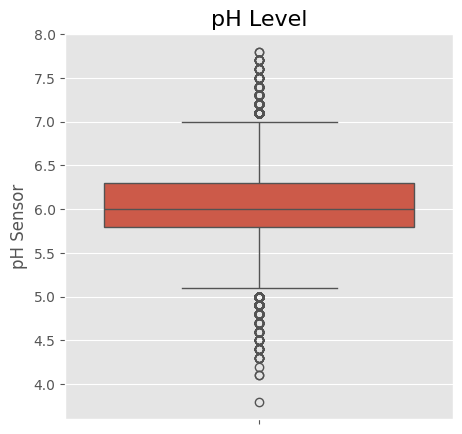

In [485]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['pH Sensor'])
plt.title('pH Level', fontsize=16)

Text(0.5, 1.0, 'pH Level')

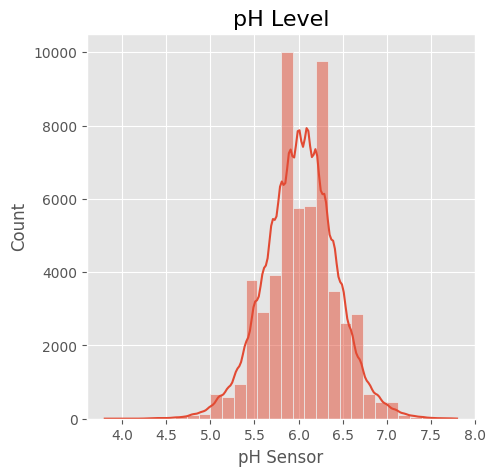

In [486]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['pH Sensor'], bins=30, kde=True)
plt.title('pH Level', fontsize=16)

In [487]:
df['pH Sensor'].describe()

count    55262.000000
mean         6.021847
std          0.400344
min          3.800000
25%          5.800000
50%          6.000000
75%          6.300000
max          7.800000
Name: pH Sensor, dtype: float64

pH Sensor data looks alright, no need to clean.

#### Water Level Sensor (mm) Outliers

Text(0.5, 1.0, 'Water Level')

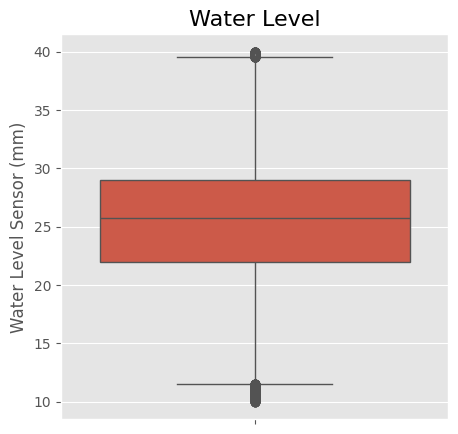

In [488]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(y=df['Water Level Sensor (mm)'])
plt.title('Water Level', fontsize=16)

Text(0.5, 1.0, 'Water Level')

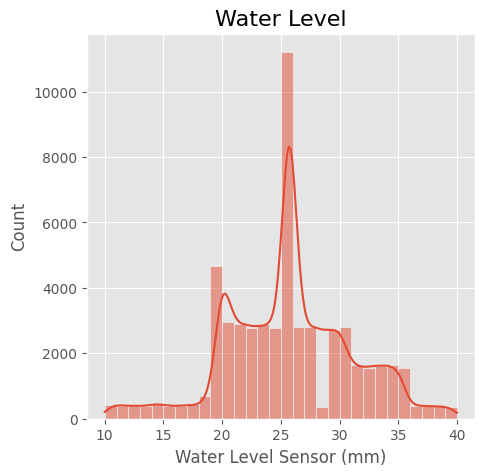

In [489]:
plt.figure(figsize=(5, 5)) 
sns.histplot(df['Water Level Sensor (mm)'], bins=30, kde=True)
plt.title('Water Level', fontsize=16)

In [490]:
df['Water Level Sensor (mm)'].describe()

count    55262.000000
mean        25.718022
std          5.370486
min         10.001955
25%         22.000000
50%         25.716878
75%         29.000000
max         39.998717
Name: Water Level Sensor (mm), dtype: float64

<Axes: >

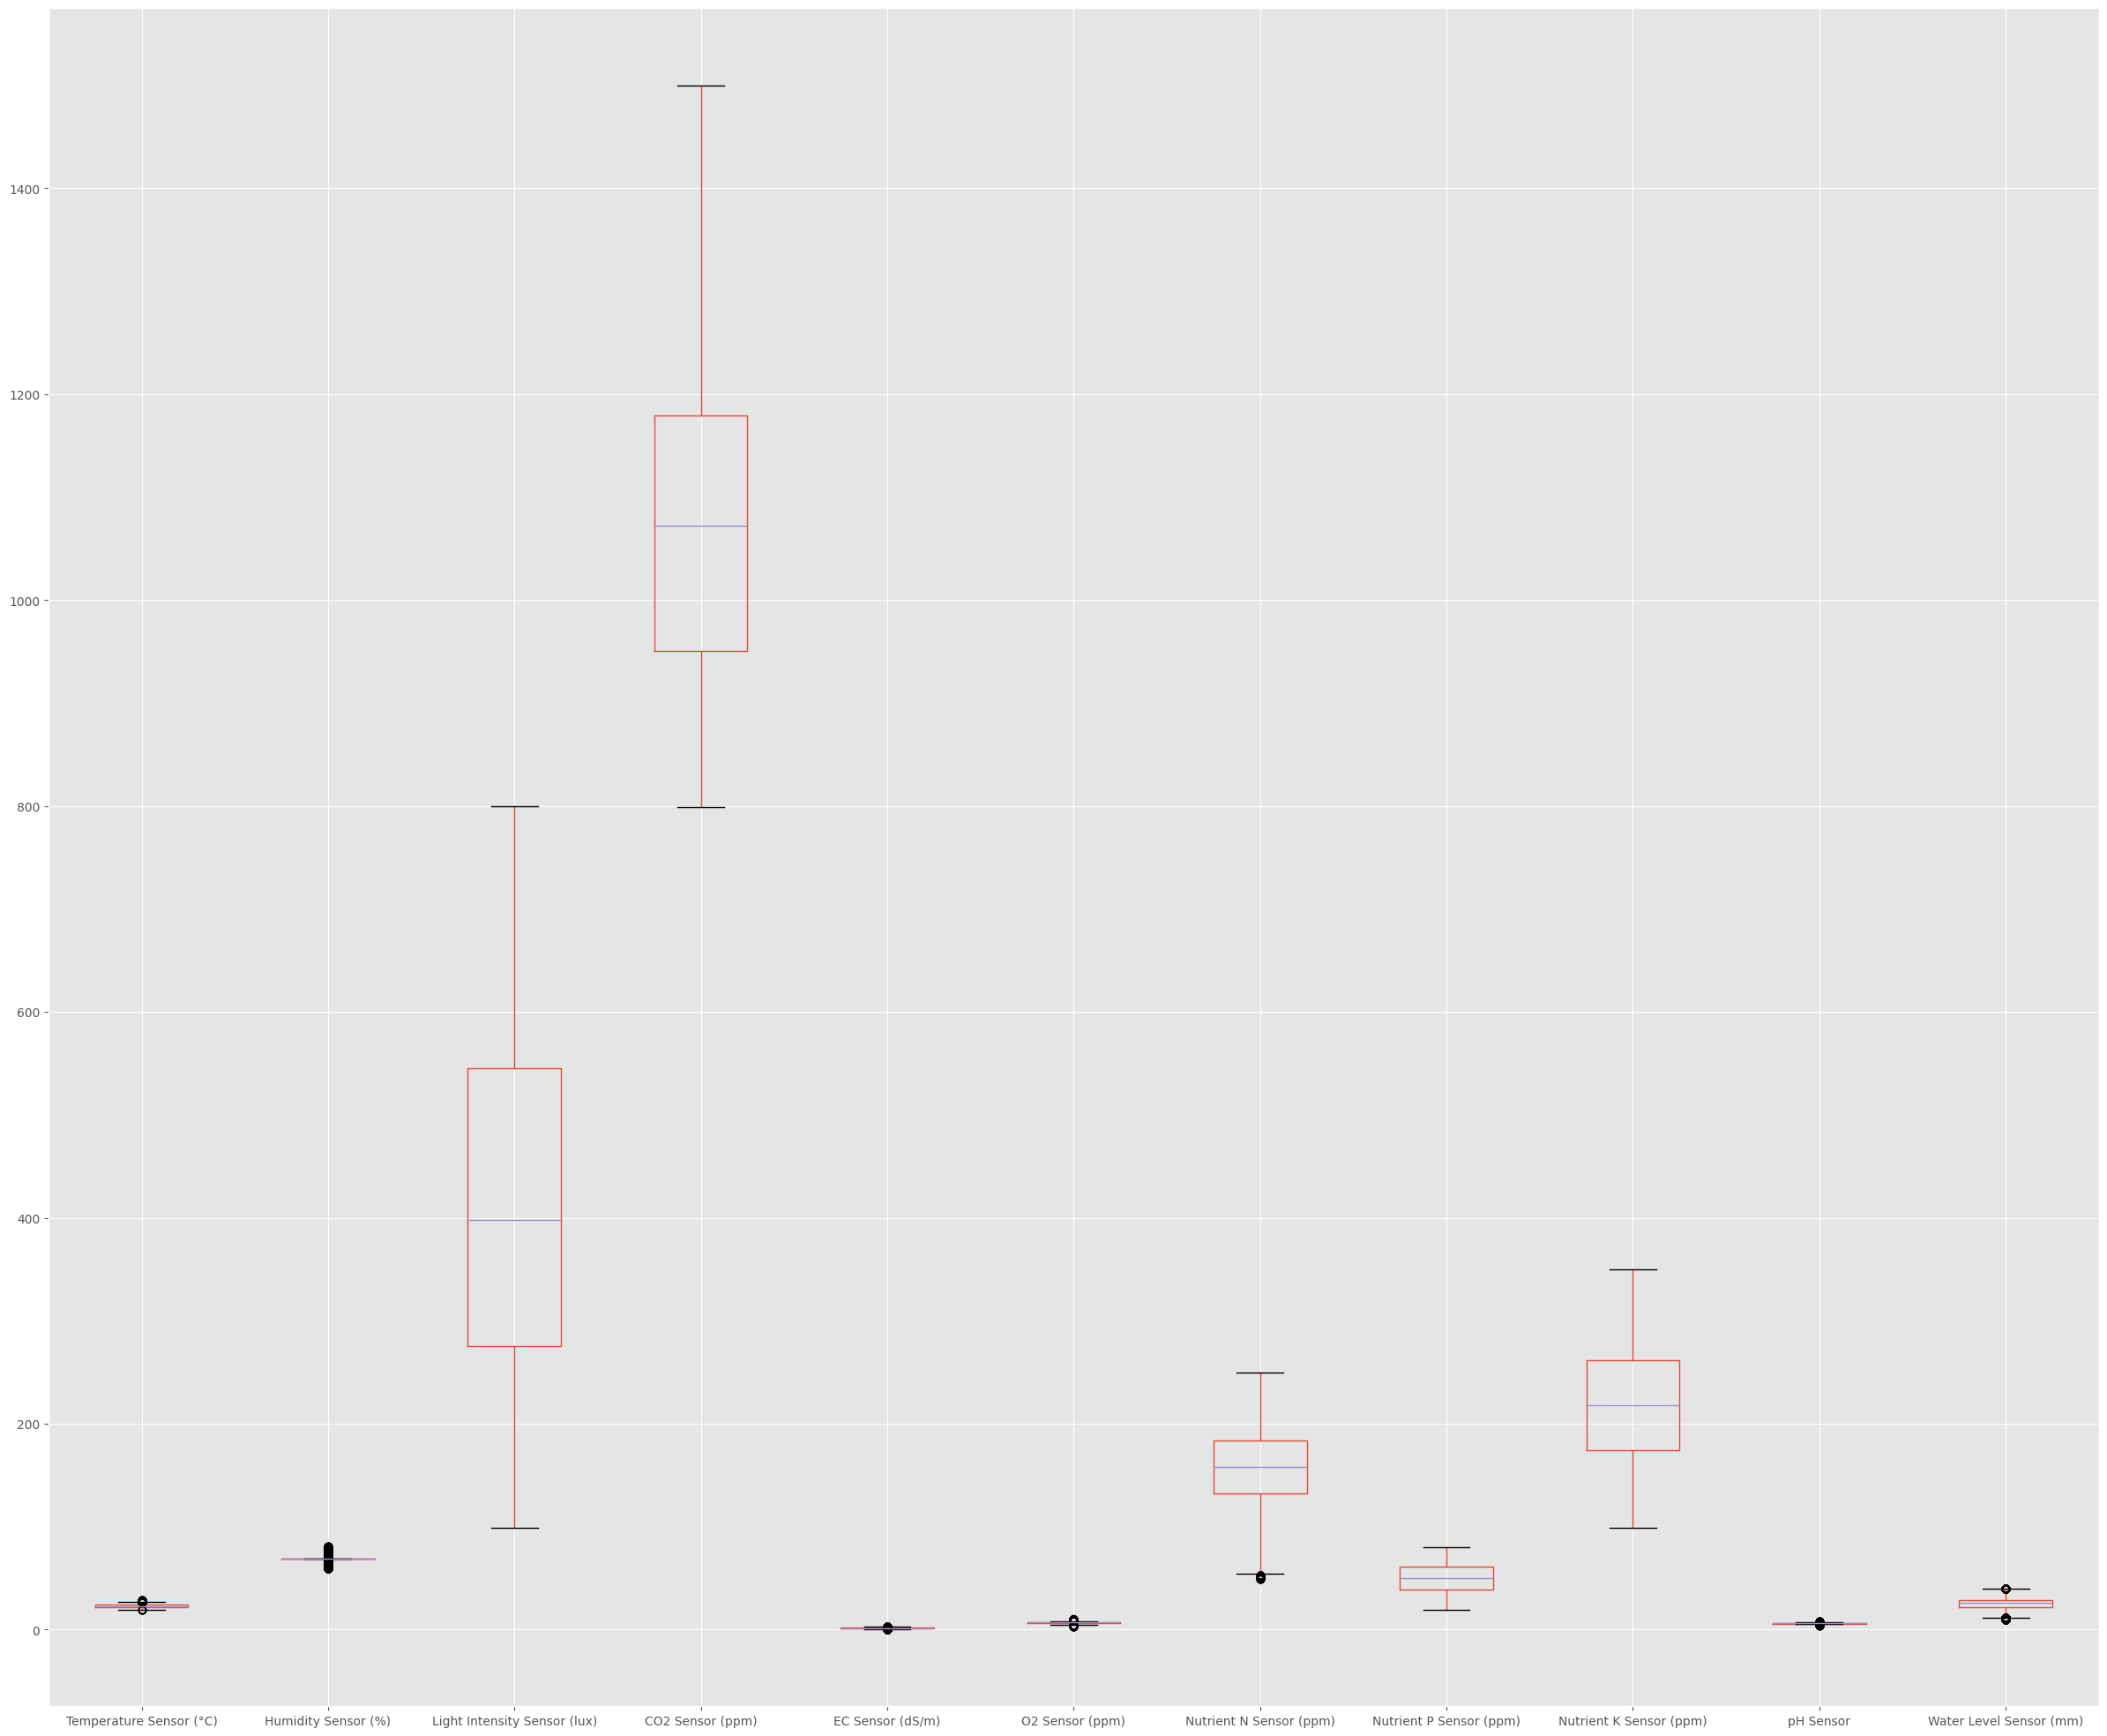

In [491]:
df.boxplot() # Reveiw of all Boxplots

In [492]:
df.shape # Review shape of dataframe after cleaning 

(55262, 15)

We now have 55,262 rows of data, compared to 57,489 rows in the original dataframe. Not too bad in terms of data lost.

## Data Visualization - Explore Correlations

In [493]:
from sklearn.preprocessing import LabelEncoder # Encode non-numerric variables to numeric values, so that we can perform correlation analysis

label_encoder = LabelEncoder()
df["Encoded System Location Code"] = label_encoder.fit_transform(df["System Location Code"])
df["Encoded Previous Cycle Plant Type"] = label_encoder.fit_transform(df["Previous Cycle Plant Type"])
df["Encoded Plant Type"] = label_encoder.fit_transform(df["Plant Type"])
df["Encoded Plant Stage"] = label_encoder.fit_transform(df["Plant Stage"])

print( "Category Mapping:", dict(zip(df["System Location Code"], df["Encoded System Location Code"])))
print( "Category Mapping:", dict(zip(df["Previous Cycle Plant Type"], df["Encoded Previous Cycle Plant Type"])))
print( "Category Mapping:", dict(zip(df["Plant Type"], df["Encoded Plant Type"])))
print( "Category Mapping:", dict(zip(df["Plant Stage"], df["Encoded Plant Stage"])))

Category Mapping: {'Zone_D': 3, 'Zone_G': 6, 'Zone_F': 5, 'Zone_C': 2, 'Zone_A': 0, 'Zone_B': 1, 'Zone_E': 4}
Category Mapping: {'Herbs': 1, 'Vine Crops': 3, 'Leafy Greens': 2, 'Fruiting Vegetables': 0}
Category Mapping: {'Vine Crops': 3, 'Herbs': 1, 'Fruiting Vegetables': 0, 'Leafy Greens': 2}
Category Mapping: {'Maturity': 0, 'Vegetative': 2, 'Seedling': 1}


In [494]:
df # View df after encoding has been performed on non-numeric variables

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm),Encoded System Location Code,Encoded Previous Cycle Plant Type,Encoded Plant Type,Encoded Plant Stage
0,Zone_D,Herbs,Vine Crops,Maturity,23.340000,69.243535,454.0,937,1.82,4,161.000000,64.0,201.000000,6.1,28.150346,3,1,3,0
1,Zone_G,Herbs,Vine Crops,Vegetative,24.160000,63.140000,441.0,938,2.13,6,161.000000,53.0,217.990277,6.5,31.000000,6,1,3,2
2,Zone_F,Herbs,Herbs,Maturity,23.840000,69.243535,562.0,1246,1.21,8,228.000000,79.0,292.000000,6.4,26.000000,5,1,1,0
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.610000,69.243535,651.0,1346,1.96,6,157.684205,53.0,289.000000,6.6,25.716878,6,1,0,2
5,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,25.960000,69.243535,675.0,1338,1.75,8,227.000000,53.0,258.000000,6.2,23.092135,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0
57486,Zone_E,Herbs,Vine Crops,Seedling,24.850000,69.243535,203.0,816,0.98,7,121.000000,41.0,114.000000,4.9,21.000000,4,1,3,1
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.450000,64.890000,502.0,911,2.27,5,190.000000,57.0,196.000000,5.9,35.000000,6,0,3,2


In [495]:
df_encoded = df.drop(columns=['System Location Code', 'Previous Cycle Plant Type', 'Plant Type', 'Plant Stage']) # Encode non-numeric variable to numeric,s o that we can explore correlations
df_encoded

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm),Encoded System Location Code,Encoded Previous Cycle Plant Type,Encoded Plant Type,Encoded Plant Stage
0,23.340000,69.243535,454.0,937,1.82,4,161.000000,64.0,201.000000,6.1,28.150346,3,1,3,0
1,24.160000,63.140000,441.0,938,2.13,6,161.000000,53.0,217.990277,6.5,31.000000,6,1,3,2
2,23.840000,69.243535,562.0,1246,1.21,8,228.000000,79.0,292.000000,6.4,26.000000,5,1,1,0
3,22.610000,69.243535,651.0,1346,1.96,6,157.684205,53.0,289.000000,6.6,25.716878,6,1,0,2
5,25.960000,69.243535,675.0,1338,1.75,8,227.000000,53.0,258.000000,6.2,23.092135,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0
57485,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0
57486,24.850000,69.243535,203.0,816,0.98,7,121.000000,41.0,114.000000,4.9,21.000000,4,1,3,1
57487,23.450000,64.890000,502.0,911,2.27,5,190.000000,57.0,196.000000,5.9,35.000000,6,0,3,2


In [496]:
df_encoded.corr() # Find correlations between variables

,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm),Encoded System Location Code,Encoded Previous Cycle Plant Type,Encoded Plant Type,Encoded Plant Stage
Temperature Sensor (°C),1.000000,0.146589,0.246993,0.150694,-0.027523,0.061315,0.012002,0.135807,-0.196869,0.040899,-0.053773,-0.002448,0.001962,-0.250892,-0.105601
Humidity Sensor (%),0.146589,1.000000,-0.207574,-0.205621,-0.074975,-0.063478,-0.282582,-0.247167,-0.357114,-0.122265,-0.043078,0.003177,-0.004661,0.109085,-0.102368
Light Intensity Sensor (lux),0.246993,-0.207574,1.000000,0.498068,0.153268,0.203216,0.550813,0.626237,0.362591,0.211008,0.049188,0.005165,-0.000191,-0.469635,0.009627
CO2 Sensor (ppm),0.150694,-0.205621,0.498068,1.000000,0.140856,0.215656,0.454334,0.483006,0.487424,0.354182,0.024198,0.001774,-0.003268,-0.605237,0.007022
EC Sensor (dS/m),-0.027523,-0.074975,0.153268,0.140856,1.000000,0.110288,0.175357,0.170188,0.188549,0.078878,0.022033,0.002223,0.002120,-0.091687,-0.120342
O2 Sensor (ppm),0.061315,-0.063478,0.203216,0.215656,0.110288,1.000000,0.209401,0.207170,0.225641,0.126524,0.010481,0.001513,-0.003414,-0.191443,-0.259932
Nutrient N Sensor (ppm),0.012002,-0.282582,0.550813,0.454334,0.175357,0.209401,1.000000,0.626036,0.536130,0.195355,0.081713,0.006385,0.000553,-0.219933,0.003125
Nutrient P Sensor (ppm),0.135807,-0.247167,0.626237,0.483006,0.170188,0.207170,0.626036,1.000000,0.487620,0.177208,0.078486,0.001338,0.001771,-0.214199,0.003248
Nutrient K Sensor (ppm),-0.196869,-0.357114,0.362591,0.487424,0.188549,0.225641,0.536130,0.487620,1.000000,0.315533,0.083228,0.002418,-0.000829,-0.336201,-0.000692
pH Sensor,0.040899,-0.122265,0.211008,0.354182,0.078878,0.126524,0.195355,0.177208,0.315533,1.000000,-0.007888,0.009260,-0.010076,-0.464064,-0.003065


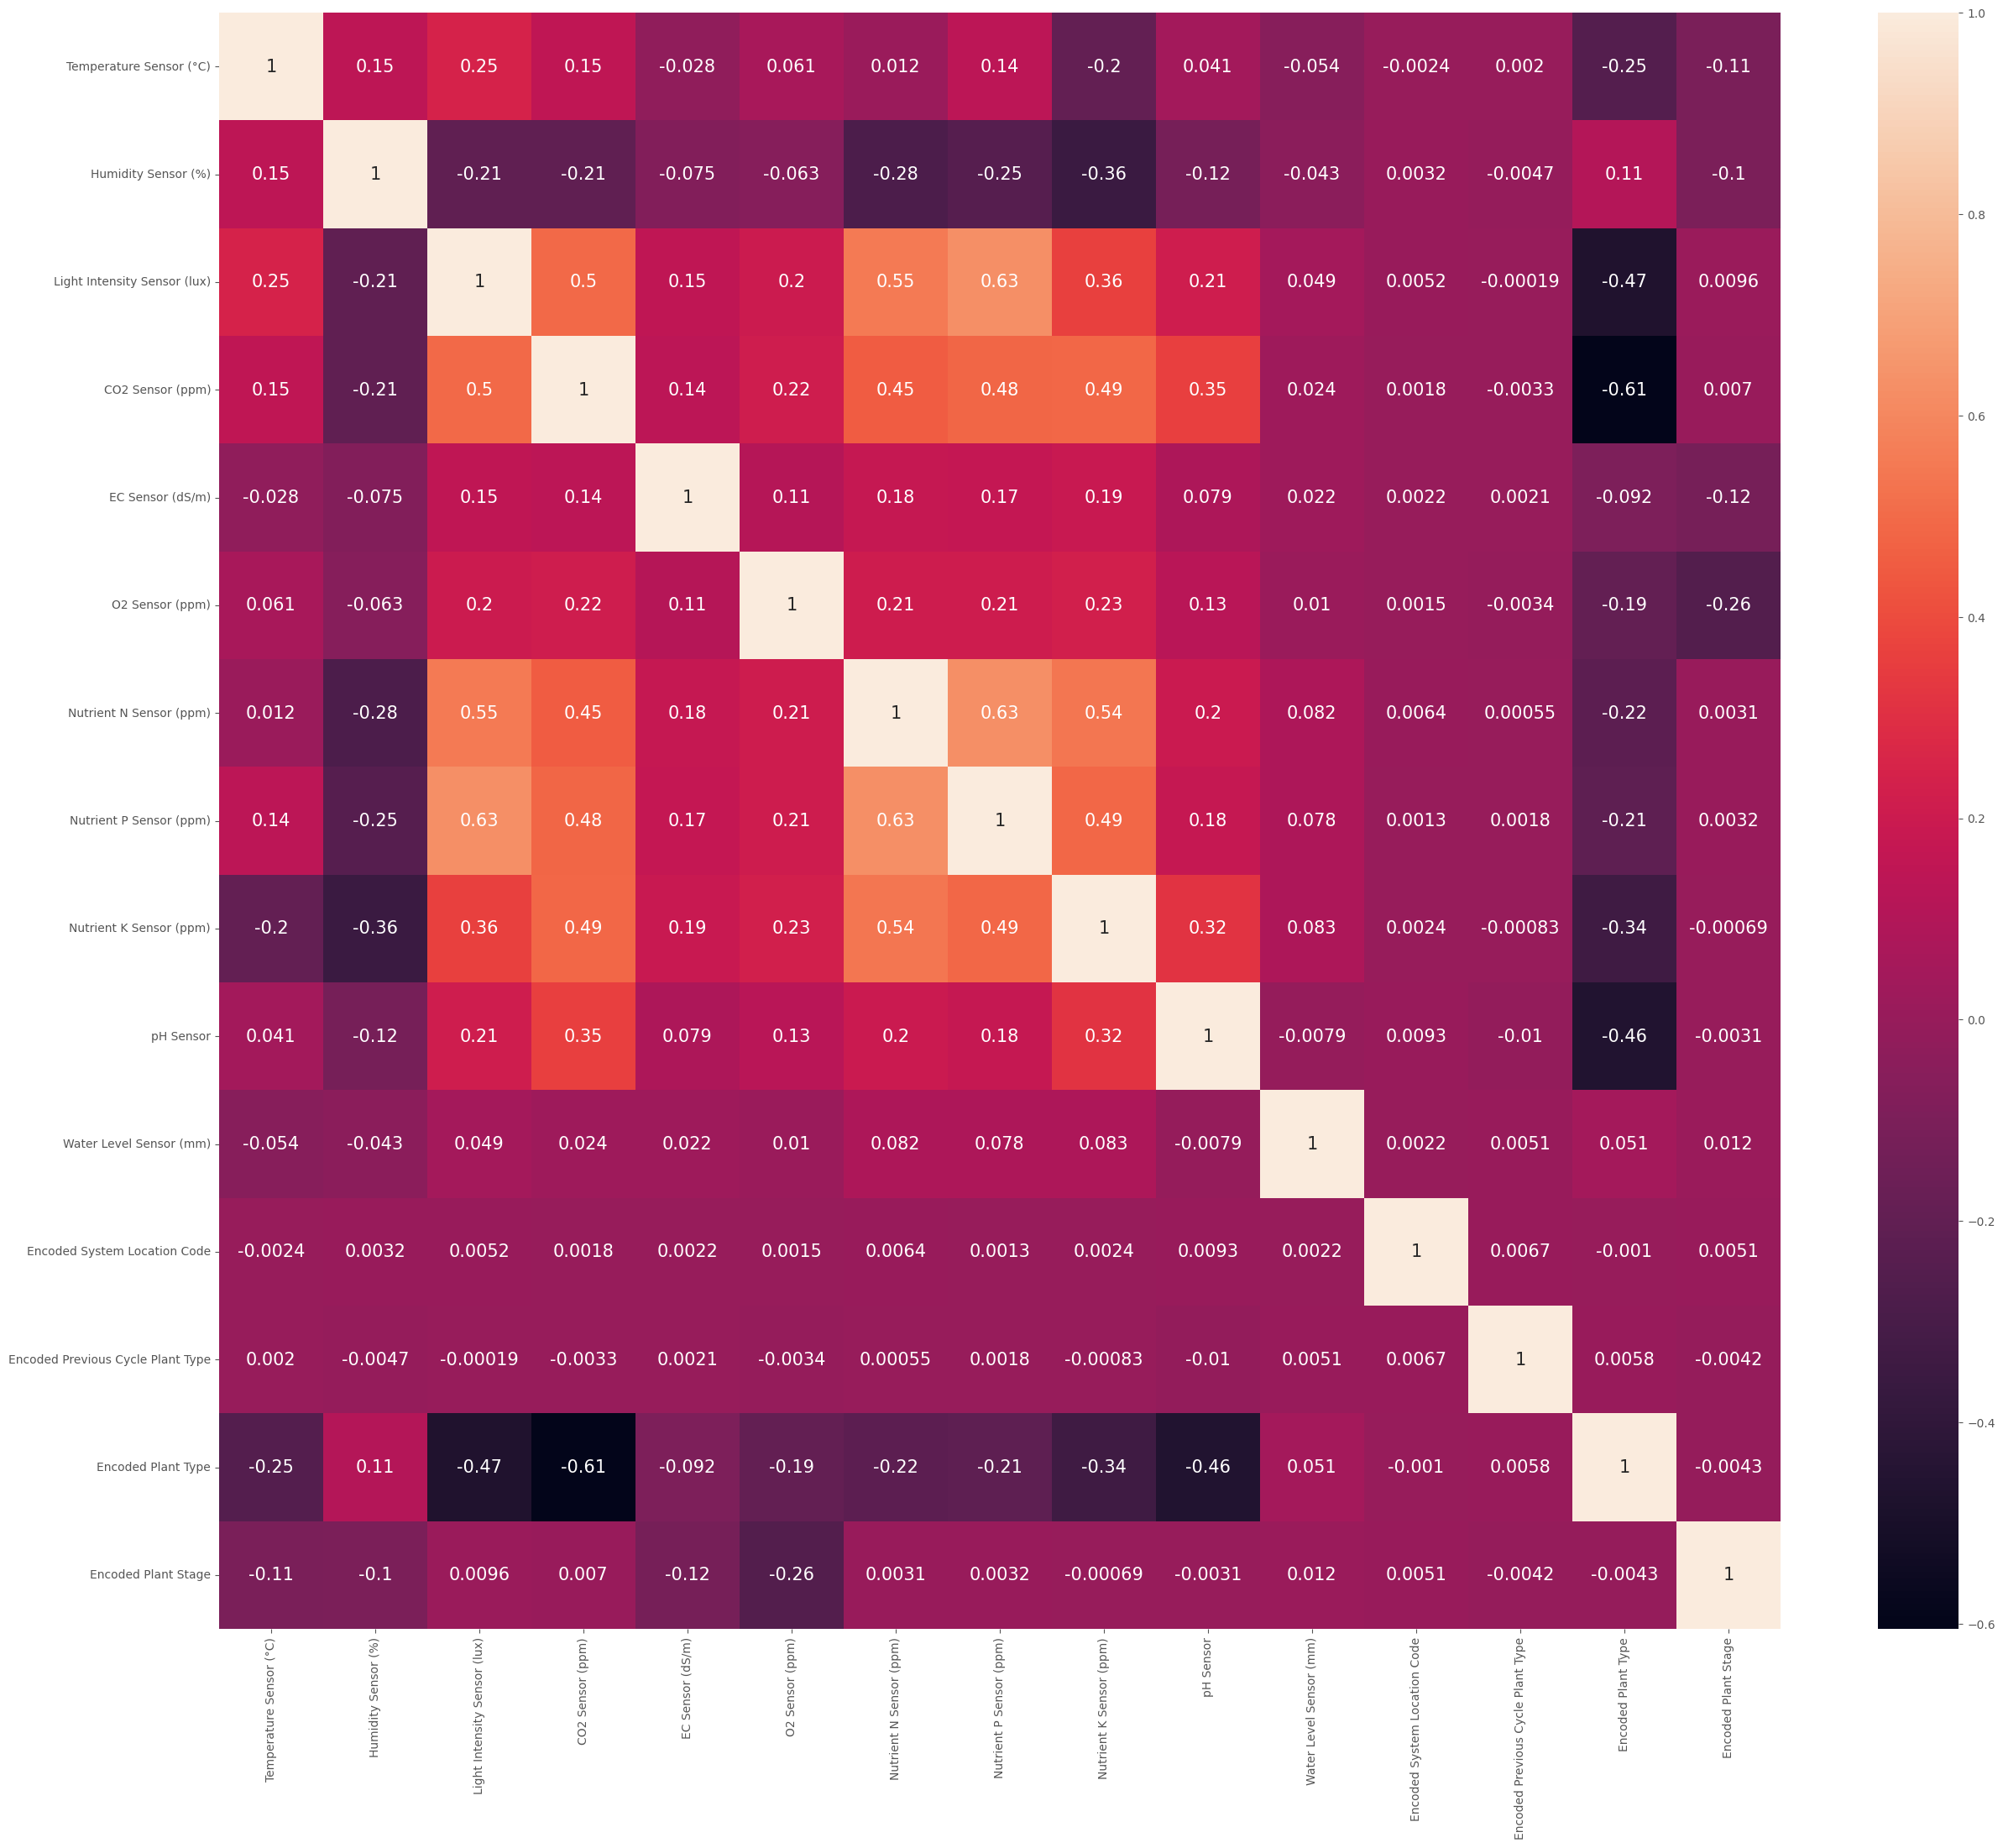

In [497]:
sns.heatmap(df_encoded.corr(), annot=True, annot_kws={'size': 15}) # Plot a heatmap to see correlations better

plt.rcParams['figure.figsize'] = (30, 25)
plt.rcParams['font.size'] = 15
plt.show()

The heatmap reveals a correlation among **Nutrients N, P, and K**
, indicating that a healthy plant tends to maintain elevated levels of all three nutrients simultaneously. Conversely, low levels of these nutrients are often observed together in less healthy plants.

The heatmap also highlights a correlation between **Nutrient N, P and K levels** and **CO2 levels**;
As well as a correlation between **Nutrient N and P levels** and **Light Intensity**.

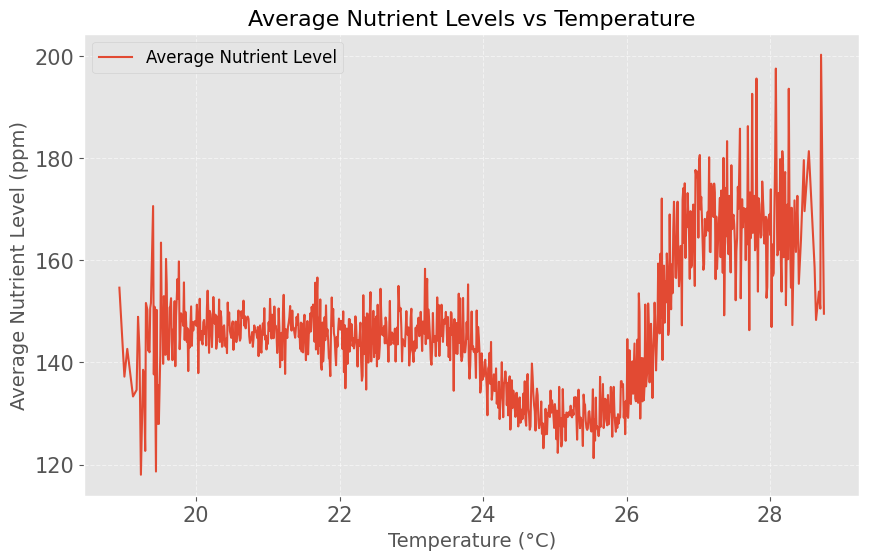

In [498]:
# Calculate the average of Nutrient N, P, and K
df['Average_Nutrient_Level'] = df[['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']].mean(axis=1)

# Group by temperature and calculate the mean average nutrient level
df_aggregated = df.groupby('Temperature Sensor (°C)')['Average_Nutrient_Level'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_aggregated['Temperature Sensor (°C)'], df_aggregated['Average_Nutrient_Level'], label='Average Nutrient Level')
plt.title('Average Nutrient Levels vs Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Average Nutrient Level (ppm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.show()

In [499]:
df

,System Location Code,Previous Cycle Plant Type,Plant Type,Plant Stage,Temperature Sensor (°C),Humidity Sensor (%),Light Intensity Sensor (lux),CO2 Sensor (ppm),EC Sensor (dS/m),O2 Sensor (ppm),Nutrient N Sensor (ppm),Nutrient P Sensor (ppm),Nutrient K Sensor (ppm),pH Sensor,Water Level Sensor (mm),Encoded System Location Code,Encoded Previous Cycle Plant Type,Encoded Plant Type,Encoded Plant Stage,Average_Nutrient_Level
0,Zone_D,Herbs,Vine Crops,Maturity,23.340000,69.243535,454.0,937,1.82,4,161.000000,64.0,201.000000,6.1,28.150346,3,1,3,0,142.000000
1,Zone_G,Herbs,Vine Crops,Vegetative,24.160000,63.140000,441.0,938,2.13,6,161.000000,53.0,217.990277,6.5,31.000000,6,1,3,2,143.996759
2,Zone_F,Herbs,Herbs,Maturity,23.840000,69.243535,562.0,1246,1.21,8,228.000000,79.0,292.000000,6.4,26.000000,5,1,1,0,199.666667
3,Zone_G,Herbs,Fruiting Vegetables,Vegetative,22.610000,69.243535,651.0,1346,1.96,6,157.684205,53.0,289.000000,6.6,25.716878,6,1,0,2,166.561402
5,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,25.960000,69.243535,675.0,1338,1.75,8,227.000000,53.0,258.000000,6.2,23.092135,2,3,0,0,179.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0,140.333333
57485,Zone_C,Vine Crops,Fruiting Vegetables,Maturity,22.138201,69.243535,619.0,1074,1.95,6,150.000000,61.0,210.000000,6.4,25.716878,2,3,0,0,140.333333
57486,Zone_E,Herbs,Vine Crops,Seedling,24.850000,69.243535,203.0,816,0.98,7,121.000000,41.0,114.000000,4.9,21.000000,4,1,3,1,92.000000
57487,Zone_G,Fruiting Vegetables,Vine Crops,Vegetative,23.450000,64.890000,502.0,911,2.27,5,190.000000,57.0,196.000000,5.9,35.000000,6,0,3,2,147.666667


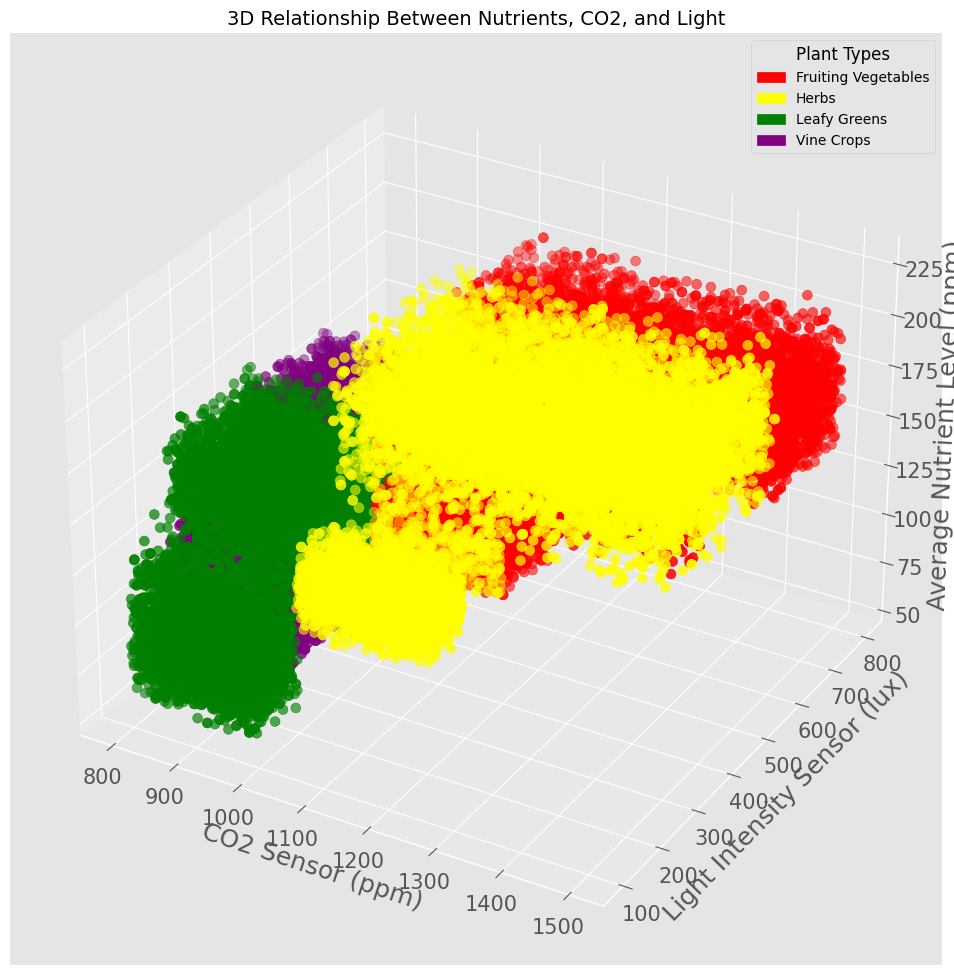

In [500]:
import matplotlib.patches as mpatches

# Define a mapping of Encoded Plant Type to colors
color_map = {
    0: 'red',
    1: 'yellow',
    2: 'green',
    3: 'purple'
}

# Assign colors to the data based on Encoded Plant Type
df['Color'] = df['Encoded Plant Type'].map(color_map)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Calculate average nutrient level
df['Average Nutrient Level (ppm)'] = df[['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']].mean(axis=1)

# Scatter plot
for plant_type, color in color_map.items():
    subset = df[df['Encoded Plant Type'] == plant_type]
    ax.scatter(
        subset['CO2 Sensor (ppm)'], 
        subset['Light Intensity Sensor (lux)'], 
        subset['Average Nutrient Level (ppm)'], 
        color=color, label=f'Plant Type {plant_type}', s=50
    )

# Create custom legend handles
custom_handles = [
    mpatches.Patch(color='red', label='Fruiting Vegetables'),
    mpatches.Patch(color='yellow', label='Herbs'),
    mpatches.Patch(color='green', label='Leafy Greens'),
    mpatches.Patch(color='purple', label='Vine Crops')
]

# Add legend
ax.legend(handles=custom_handles, title='Plant Types', fontsize=10, title_fontsize=12, loc='best')

# Labels and title
ax.set_xlabel('CO2 Sensor (ppm)')
ax.set_ylabel('Light Intensity Sensor (lux)')
ax.set_zlabel('Average Nutrient Level (ppm)')
plt.title('3D Relationship Between Nutrients, CO2, and Light', fontsize=14)

plt.tight_layout()
plt.show()

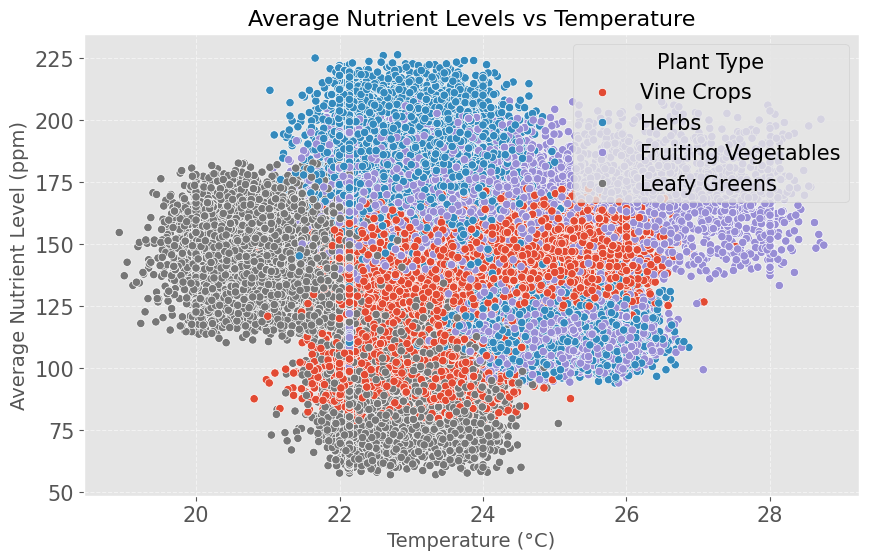

In [502]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Temperature Sensor (°C)'], 
    y=df['Average_Nutrient_Level'], 
    hue=df['Plant Type'],
)
plt.title('Average Nutrient Levels vs Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Average Nutrient Level (ppm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

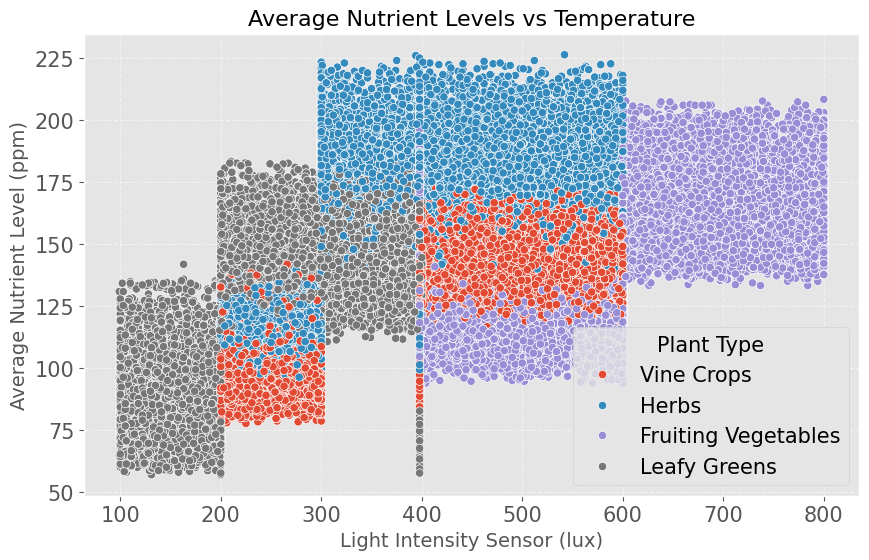

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Light Intensity Sensor (lux)'], 
    y=df['Average_Nutrient_Level'], 
    hue=df['Plant Type'],
)
plt.title('Light Intensity vs Temperature', fontsize=16)
plt.xlabel('Light Intensity Sensor (lux)', fontsize=14)
plt.ylabel('Average Nutrient Level (ppm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

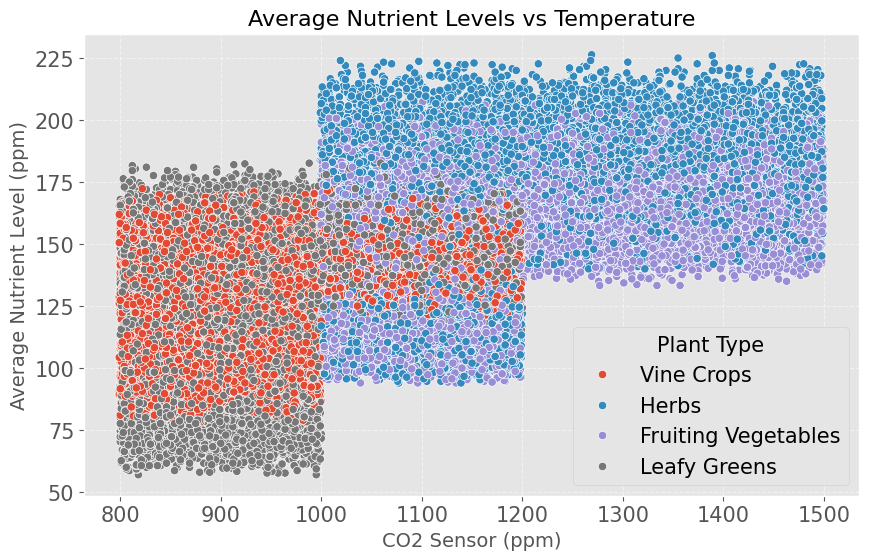

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['CO2 Sensor (ppm)'], 
    y=df['Average_Nutrient_Level'], 
    hue=df['Plant Type']
)
plt.title('CO2 Levels vs Temperature', fontsize=16)
plt.xlabel('CO2 Sensor (ppm)', fontsize=14)
plt.ylabel('Average Nutrient Level (ppm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Axes: xlabel='Plant Type', ylabel='Temperature Sensor (°C)'>

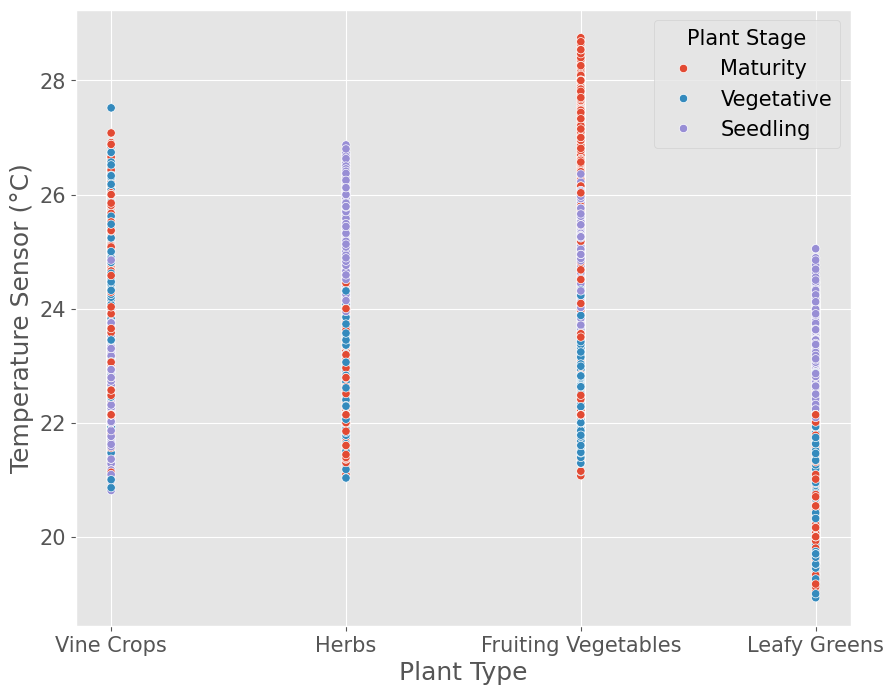

In [505]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Plant Type',
                y='Temperature Sensor (°C)',
                hue='Plant Stage',
                data=df)

In [506]:
df.groupby(['Plant Stage', 'Plant Type'])['Temperature Sensor (°C)'].describe()

count       mean       std        min  \
Plant Stage Plant Type                                                    
Maturity    Fruiting Vegetables  4508.0  24.592894  1.990753  21.070000   
            Herbs                4659.0  22.875425  0.694740  21.090000   
            Leafy Greens         4639.0  21.173069  0.752484  19.040000   
            Vine Crops           4562.0  23.697375  1.342394  21.040000   
Seedling    Fruiting Vegetables  4732.0  24.560897  1.222289  22.138201   
            Herbs                4610.0  24.562681  1.194613  22.138201   
            Leafy Greens         4686.0  22.863026  0.689058  20.420000   
            Vine Crops           4546.0  22.861277  0.703632  20.810000   
Vegetative  Fruiting Vegetables  4632.0  22.883574  0.701226  21.140000   
            Herbs                4623.0  22.877997  0.706147  21.030000   
            Leafy Greens         4483.0  21.169104  0.754684  18.930000   
            Vine Crops           4582.0  23.707719  1.334890  20.860000   

                                       25%    50%      75%    max  
Plant Stage Plant Type                                             
Maturity    Fruiting Vegetables  22.600000  24.50  26.3225  28.75  
            Herbs                22.150000  22.83  23.4300  25.00  
            Leafy Greens         20.555000  21.19  21.9100  23.02  
            Vine Crops           22.290000  23.57  24.8700  27.08  
Seedling    Fruiting Vegetables  24.080000  24.83  25.4600  27.07  
            Herbs                24.100000  24.80  25.4475  26.87  
            Leafy Greens         22.150000  22.82  23.4000  25.05  
            Vine Crops           22.138201  22.78  23.4400  25.22  
Vegetative  Fruiting Vegetables  22.138201  22.83  23.4700  24.95  
            Herbs                22.138201  22.83  23.4500  25.08  
            Leafy Greens         20.560000  21.18  21.8700  23.32  
            Vine Crops           22.340000  23.62  24.8675  27.52